# Titanic Dataset - Classification Demo using Scikit-learn

Oh Chin Lock, Ler Lay Guat, Liu Fan  |  Temasek Polytechnic

Info on the dataset - https://www.kaggle.com/c/titanic

## A quick tutorial

![title](images/supervised-learning.png)

Labelled data to train the classifer.  Use classifer to predict labels of new data.

### Common types of classifers

Here are some of the popular Classification techniques:

1. **Decision Tree Classifier** - This methodology uses a decision tree as the predictive model. It is used in cases where all the features have a finite discrete domain and there is a single target feature. The tree is created using the sample data where each internal node splits into 2 or more sub trees according to the discrete function of the input attribute value.
2. **Naive Bayes Classifier** - Naive Bayes classifier is a family of classifiers that work on the assumption that the value of a particular feature is independent of the value of any other feature (hence naive). The model assigns class labels to the data, represented as vectors of feature values. It is based on the Bayes theorem and hence are probabilistic in nature. This classification technique is used mostly in text classification (spam/not spam or sports, politics or entertainment etc.).
3. **Random Forests Classifier** - This model is an extension of decision tree classifier. Many classification trees are grown to classify a new object from an input vector. Each tree then gives a classification, and we say the tree votes for that class. The forest chooses the class which has the maximum number of votes.
4. **Hidden Markov Model Classifier** - It is a statistical model of a process consisting of two random variables, say A and B, which change their state sequentially. One of the two variables, A is termed as hidden variable as its state cannot be observed directly. The state of "A" changes with Markov property, i.e. the state change probability only depends on its current state and does not change in time. The variable B is called as the observed variable since its state can be directly observed. B does not follow the Markov property, but its state probability statically depends on the current state of A.
5. **Multi-layer Perceptron** - A multilayer perceptron is a biologically inspired feed-forward network that can be trained to represent a nonlinear mapping between input and output data. It consists of multiple layers, each containing multiple artificial neuron units and can be used for classification and regression tasks in a supervised learning approach.
6. **K-nearest Neighbours** - In k-NN classification, the object is classified by a majority vote of its neighbours. The object is assigned to the class which is most common among its k nearest neighbours. Weights are generally assigned to the neighbours while using this algorithm.

For more info, refer: http://www.allprogrammingtutorials.com/tutorials/introduction-to-machine-learning.php

## Why Scikit-learn?

* Open source python library
* Active community of users
* Comprehensive set of algorithms
* Good documentation  http://scikit-learn.org/stable/modules/classes.html
* Easy to use
* Good for quick prototyping

Ben Lorica: [Six reasons why I recommend scikit-learn](http://radar.oreilly.com/2013/12/six-reasons-why-i-recommend-scikit-learn.html)

## Requirements for working with data in scikit-learn

1. Features and response should be **separate objects**
2. Features and response should be entirely **numeric**
3. Features and response should be **NumPy arrays** (or easily converted to NumPy arrays)

More info on scikit-learn - http://scikit-learn.org/stable/index.html

# Demo using scikit-learn

In [22]:
import pandas 
import sklearn 
sklearn.__version__

'0.18.1'

In [23]:
data = pandas.read_csv('data/titanic_train.csv')
print data.shape
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable Name	 Description

* Survived = Survived (1) or died (0)
* Pclass = Passenger’s class
* Name = Passenger’s name
* Sex = Passenger’s sex
* Age = Passenger’s age
* SibSp = Number of siblings/spouses aboard
* Parch = Number of parents/children aboard
* Ticket = Ticket number
* Fare = Fare
* Cabin = Cabin
* Embarked = Port of embarkation

## Objective

Build a **binary classification model** to predict whether a passenger will survive, based on the features available in the dataset.

* 1 = survive
* 0 = die

## Explore Data

Transform 'Sex' to numeric labels and append as 'Sex1'

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Sex'])
data['Sex1'] = le.transform(data['Sex'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


We look at how the variables are correlated to one another.

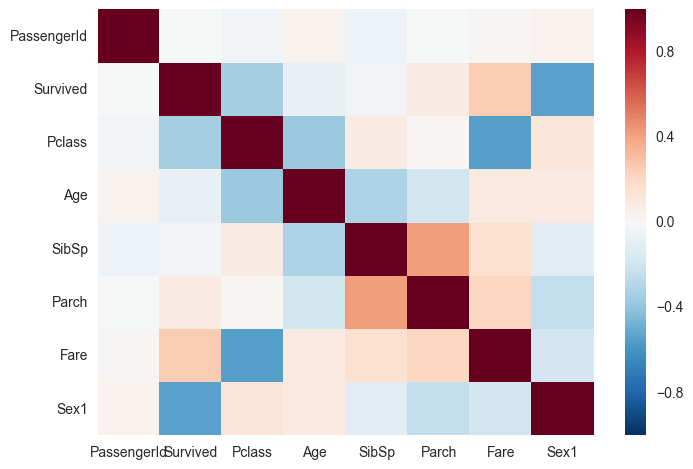

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr())  # heatmap of correlations

## Select Target and features, and split dataset into train and test

In [25]:
y, X = data['Survived'], data[['Sex1', 'Fare', 'Age']].fillna(0)

Selecting features is a big topic in itself - see http://machinelearningmastery.com/an-introduction-to-feature-selection/    

In this case, we simply select features that is highly correlated to the target which we also think make sense to the problem at hand.

We also split the data set into training and test.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print "Train/Test Split = ", X_train.shape, X_test.shape

Train/Test Split =  (712, 3) (179, 3)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117cfa990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11817f610>]], dtype=object)

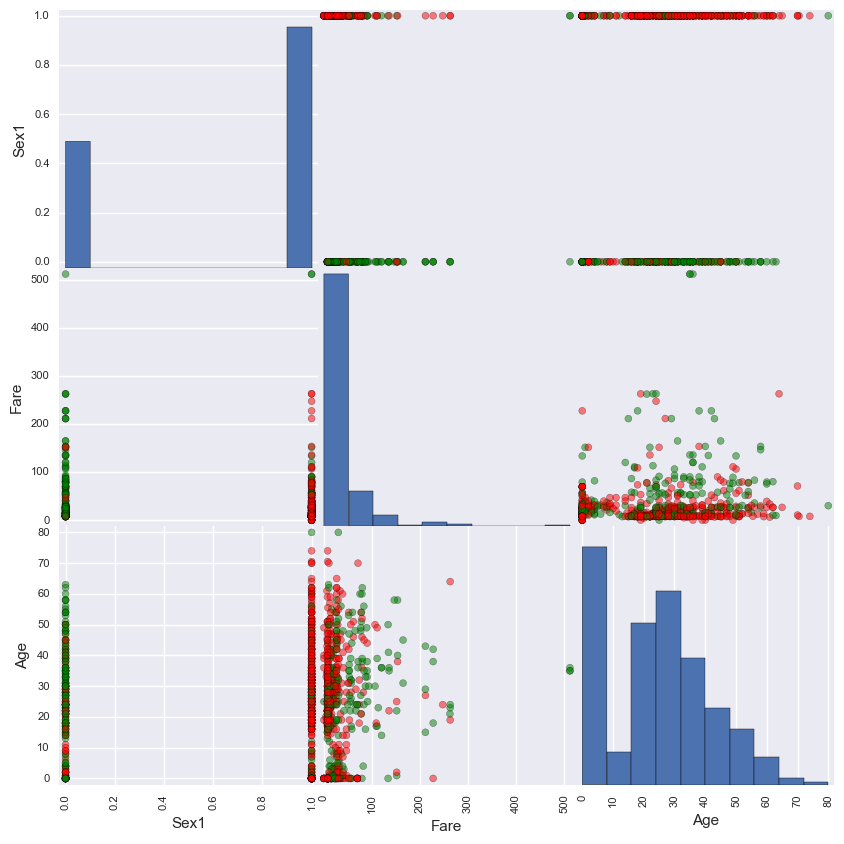

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green'])  # 0=die=red; 1=survive=green
pandas.scatter_matrix(X_train, c=colors[y_train], figsize=(10,10), s=100)

## Building Models

## 1) Use K nearest neighbors

In k-NN classification, the object is classified by a majority vote of its neighbours. The object is assigned to the class which is most common among its k nearest neighbours. Weights are generally assigned to the neighbours while using this algorithm.

Here, we choose K=5 (odd number) as we are doing a binary classification.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # choose an odd K since we are doing binary classification
knn.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
pred = knn.predict(X_train)

print "Accuracy (KNN) =", accuracy_score(y_train, pred)

Accuracy (KNN) = 0.786516853933


## 2) Use Logistic Regression

Logistic regression is a generalization of linear regression to classification problems.

In linear regression, we used a set of covariates to predict the value of a (continuous) outcome variable.
In logistic regression, we use a set of covariates to predict probabilities of (binary) class membership.
These probabilities are then mapped to class labels, thus solving the classification problem.

![title](images/logit.png)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
print "Accuracy (logit) = ", accuracy_score(y_train, lr.predict(X_train))

Accuracy (logit) =  0.783707865169


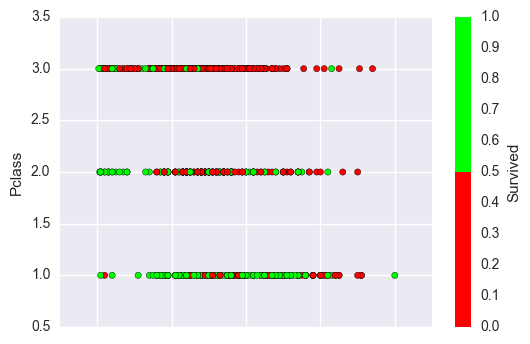

In [30]:
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
data.plot(kind='scatter', x='Age', y='Pclass', c='Survived', colormap=cmap_bold)

### Background

**Quote from a survivor on a boat:-**
"In no instance, I am happy to say, did I hear any word of rebuke from a swimmer because of a refusal to grant assistance... [one refusal] was met with the manly voice of a powerful man... 'All right boys, good luck and God bless you'."

The survivors were mainly the ones in boats.  Only a few swimmers survived.  Also, the first class and second class passengers were given 'priority' when boarding boats, which resulted in a series of regulations later on.  You see the survival rates

**Take away** - domain knowledge is important in feature selection.

## How do we evaluate a classifier?  -- Confusion Matrix


In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

confusion_matrix(y_train, lr.predict(X_train))

# rows are actual class
# columns are predicted class
#
# TN FP
# FN TP

array([[375,  69],
       [ 85, 183]])

In [32]:
print "accuracy (TP+TN / TP+TN+FP+FN) =", accuracy_score(y_train, lr.predict(X_train))
print "recall (TP / TP+FN ) =", recall_score(y_train, lr.predict(X_train))
print "precision (TP / TP+FP) =", precision_score(y_train, lr.predict(X_train))

accuracy (TP+TN / TP+TN+FP+FN) = 0.783707865169
recall (TP / TP+FN ) = 0.682835820896
precision (TP / TP+FP) = 0.72619047619


The **logit classifier** only detects 68% of all actual positives (**recall**), and claims a positive correctly 72% of the time (**precision**).

## Question -- which is more important (precision or recall)?

If you want to save as many potential survivors as possible, given that ....

- you have __unlimited__ rescue resources ? 

- you have __limited__ rescue resources ? 

![title](images/precision-recall1.png)  

Source: Wikipedia

_ps: answer keys at the end_

In [35]:
from sklearn.metrics import f1_score

print "F1 score =", f1_score(y_train, lr.predict(X_train))   
#f1 score is high only when both precision and recall are high

F1 score = 0.703846153846


## 3) Use Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=7)   # depth of 7
tree.fit(X_train, y_train)
print classification_report(y_train, tree.predict(X_train))

             precision    recall  f1-score   support

          0       0.86      0.94      0.90       444
          1       0.89      0.75      0.81       268

avg / total       0.87      0.87      0.87       712



![title](images/tree.png)

## 4) Use Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=25)    # 25 tress in the forest
rf.fit(X_train, y_train)
print classification_report(y_train, rf.predict(X_train))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       444
          1       0.98      0.96      0.97       268

avg / total       0.98      0.98      0.98       712



Tree 1:
![title](images/rftree0.png)

Trees [2 ... 24]

Tree 25:
![title](images/rftree24.png)

Very high accuracy for Decision Tree and Random Forest on the **TRAINING SET**.  Is this good?

## Over and Under fitting

In overfitting, a statistical model describes random error or noise instead of the underlying relationship. Overfitting occurs when a model is excessively complex, such as having too many parameters relative to the number of observations. A model that has been overfit has poor predictive performance, as it overreacts to minor fluctuations in the training data.

![title](images/overfit.png)


Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. Underfitting would occur, for example, when fitting a linear model to non-linear data. Such a model would have poor predictive performance.

Source: Wikipedia



## Can the classifier GENERALIZE?
### How good is the prediction with the Test Set?


In [38]:
print "(1) KNN with Test Set:"
print classification_report(y_test, knn.predict(X_test))

print "(2) Logit with Test Set:"
print classification_report(y_test, lr.predict(X_test))

print "(3) Decision Tree with Test Set:"
print classification_report(y_test, tree.predict(X_test))

print "(4) Random Forest with Test Set:"
print classification_report(y_test, rf.predict(X_test))

(1) KNN with Test Set:
             precision    recall  f1-score   support

          0       0.71      0.86      0.78       105
          1       0.71      0.50      0.59        74

avg / total       0.71      0.71      0.70       179

(2) Logit with Test Set:
             precision    recall  f1-score   support

          0       0.80      0.83      0.81       105
          1       0.74      0.70      0.72        74

avg / total       0.78      0.78      0.78       179

(3) Decision Tree with Test Set:
             precision    recall  f1-score   support

          0       0.77      0.86      0.81       105
          1       0.76      0.64      0.69        74

avg / total       0.76      0.77      0.76       179

(4) Random Forest with Test Set:
             precision    recall  f1-score   support

          0       0.80      0.85      0.82       105
          1       0.76      0.70      0.73        74

avg / total       0.79      0.79      0.79       179



## Conclusion

Question -- Can the classifer generalize for all ships?

Question -- How can you improve the accuracy some more?


# The End

_(answer keys)_

* Unlimited resources - just recall is important.  Classifer identifies as many survivors as possible, regardless of false positives.

* Limited resources - both recall and precision are important.  Classifier should identify as many survivors as possible, and minimize false positives.